In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import re
def count_colored_symbols(mana_cost):
    matches_list = re.findall(pattern=r'\{[2\\]*[WUBRG][\/P]*\}', string=mana_cost)
    return len(matches_list)

In [2]:
#This cell gets all the data from the scryfall API
feature_list = ['power','toughness','cmc','colors','oracle_text','mana_cost','rarity']
response = requests.get('https://api.scryfall.com/cards/search?q=t%3Acreature+-c%3Am+f%3Amodern+-c%3Ac+-t%3Aenchantment+-t%3Asorcery+-t%3Aland+-is%3Adfc+-is%3Aflip')
pages = response.json()['total_cards']//175 + 1 #api sends 175 results per page

cards = pd.DataFrame('', index=np.arange(response.json()['total_cards']),columns = feature_list)
idx = 0

for _ in range(pages):
    cur_card_list = response.json()['data']
    for card in cur_card_list:
        for feature in feature_list:
            cards.at[idx, feature] = card[feature]
        idx+=1
    time.sleep(.1)
    if response.json()['has_more']:
        response = requests.get(response.json()['next_page'])

In [3]:
cards

,power,toughness,cmc,colors,oracle_text,mana_cost,rarity
0,3,2,4,[B],First strike\nWhenever a creature dealt damage...,{3}{B},uncommon
1,2,2,4,[W],"Flying, vigilance",{3}{W},common
2,2,1,2,[R],Prowess (Whenever you cast a noncreature spell...,{1}{R},rare
3,6,6,7,[B],Flying\nWhen Abhorrent Overlord enters the bat...,{5}{B}{B},rare
4,2,3,4,[W],"Haunt (When this creature dies, exile it haunt...",{3}{W},common
5,1,1,2,[W],{T}: Prevent the next 1 damage that would be d...,{1}{W},uncommon
6,2,2,3,[B],"Whenever an opponent discards a card, Abyssal ...",{1}{B}{B},rare
7,6,6,4,[B],"Flying, trample\nYou can't win the game and yo...",{2}{B}{B},rare
8,2,3,4,[B],Flying\nWhenever Abyssal Specter deals damage ...,{2}{B}{B},uncommon
9,3,2,4,[W],"Outlast {W} ({W}, {T}: Put a +1/+1 counter on ...",{3}{W},uncommon


In [4]:
cards.to_pickle('card_dataframe.pkl')

In [5]:
cards = pd.read_pickle('card_dataframe.pkl')

In [6]:
#Remove cards with "*" in their power or toughness, and convert P/T, cmc to float
cards.replace(to_replace=r'.*\*.*',value='nan',regex=True, inplace=True)
cards.power = cards.power.astype(np.float_)
cards.toughness = cards.toughness.astype(np.float_)
cards.cmc = cards.cmc.astype(np.float_)
cards.dropna(inplace=True)

#Numer-ify colors and rarity
cards.colors = cards.colors.apply(lambda x: x[0])
cards.replace(to_replace = {'colors':{'W':1., 'U':2., 'B':3., 'R':4., 'G':5.}}, inplace = True)
cards.replace(to_replace = {'rarity':{'common':1., 'uncommon':2., 'rare':3., 'mythic':4.}}, inplace = True)

#adding the num_sumbols columns
cards = cards.merge(cards.mana_cost.apply(count_colored_symbols).to_frame('num_symbols'), left_index=True, right_index=True)
cards.num_symbols = cards.num_symbols.astype(np.float_)

In [10]:
cards.to_pickle('card_dataframe.pkl')

In [58]:
cards = pd.read_pickle('card_dataframe.pkl')

In [133]:
cards['pow_gt_tou'] = cards.power > cards.toughness
cards['pow_eq_tou'] = cards.power == cards.toughness
cards['pow_tou_ratio'] = cards.power/cards.toughness
cards['pow_cmc_ratio'] = cards.power/cards.cmc
cards['tou_cmc_ratio'] = cards.toughness/cards.cmc
cards['symbols_per_cmc'] = cards.num_symbols/cards.cmc
cards['pow_sq'] = cards.power**2
cards['tou_sq'] = cards.toughness**2
cards['cmc_sq'] = cards.cmc**2
cards['num_sym_sq'] = cards.num_symbols**2
cards['num_sym_cube'] = cards.num_symbols**3
cards['num_sym_fourth'] = cards.num_symbols**4
cards['cmc_ratio_num_sym_sq'] = cards.cmc/cards.num_symbols**2
cards['is_common'] = cards.rarity == 1
cards['is_uncommon'] = cards.rarity == 2
cards['is_rare'] = cards.rarity == 3
cards['is_mythic'] = cards.rarity == 4

In [60]:
cards

,power,toughness,cmc,colors,oracle_text,mana_cost,rarity,num_symbols,pow_gt_tou,pow_eq_tou,...,pow_cmc_ratio,tou_cmc_ratio,symbols_per_cmc,pow_sq,tou_sq,cmc_sq,num_sym_sq,num_sym_cube,num_sym_fourth,cmc_ratio_num_sym_sq
0,3.0,2.0,4.0,3.0,First strike\nWhenever a creature dealt damage...,{3}{B},2.0,1.0,True,False,...,0.750000,0.500000,0.250000,9.0,4.0,16.0,1.0,1.0,1.0,4.00
1,2.0,2.0,4.0,1.0,"Flying, vigilance",{3}{W},1.0,1.0,False,True,...,0.500000,0.500000,0.250000,4.0,4.0,16.0,1.0,1.0,1.0,4.00
2,2.0,1.0,2.0,4.0,Prowess (Whenever you cast a noncreature spell...,{1}{R},3.0,1.0,True,False,...,1.000000,0.500000,0.500000,4.0,1.0,4.0,1.0,1.0,1.0,2.00
3,6.0,6.0,7.0,3.0,Flying\nWhen Abhorrent Overlord enters the bat...,{5}{B}{B},3.0,2.0,False,True,...,0.857143,0.857143,0.285714,36.0,36.0,49.0,4.0,8.0,16.0,1.75
4,2.0,3.0,4.0,1.0,"Haunt (When this creature dies, exile it haunt...",{3}{W},1.0,1.0,False,False,...,0.500000,0.750000,0.250000,4.0,9.0,16.0,1.0,1.0,1.0,4.00
5,1.0,1.0,2.0,1.0,{T}: Prevent the next 1 damage that would be d...,{1}{W},2.0,1.0,False,True,...,0.500000,0.500000,0.500000,1.0,1.0,4.0,1.0,1.0,1.0,2.00
6,2.0,2.0,3.0,3.0,"Whenever an opponent discards a card, Abyssal ...",{1}{B}{B},3.0,2.0,False,True,...,0.666667,0.666667,0.666667,4.0,4.0,9.0,4.0,8.0,16.0,0.75
7,6.0,6.0,4.0,3.0,"Flying, trample\nYou can't win the game and yo...",{2}{B}{B},3.0,2.0,False,True,...,1.500000,1.500000,0.500000,36.0,36.0,16.0,4.0,8.0,16.0,1.00
8,2.0,3.0,4.0,3.0,Flying\nWhenever Abyssal Specter deals damage ...,{2}{B}{B},2.0,2.0,False,False,...,0.500000,0.750000,0.500000,4.0,9.0,16.0,4.0,8.0,16.0,1.00
9,3.0,2.0,4.0,1.0,"Outlast {W} ({W}, {T}: Put a +1/+1 counter on ...",{3}{W},2.0,1.0,True,False,...,0.750000,0.500000,0.250000,9.0,4.0,16.0,1.0,1.0,1.0,4.00


In [134]:
toX = cards.copy()

In [135]:
toX

,power,toughness,cmc,colors,oracle_text,mana_cost,rarity,num_symbols,pow_gt_tou,pow_eq_tou,...,tou_sq,cmc_sq,num_sym_sq,num_sym_cube,num_sym_fourth,cmc_ratio_num_sym_sq,is_common,is_uncommon,is_rare,is_mythic
0,3.0,2.0,4.0,3.0,First strike\nWhenever a creature dealt damage...,{3}{B},2.0,1.0,True,False,...,4.0,16.0,1.0,1.0,1.0,4.00,False,True,False,False
1,2.0,2.0,4.0,1.0,"Flying, vigilance",{3}{W},1.0,1.0,False,True,...,4.0,16.0,1.0,1.0,1.0,4.00,True,False,False,False
2,2.0,1.0,2.0,4.0,Prowess (Whenever you cast a noncreature spell...,{1}{R},3.0,1.0,True,False,...,1.0,4.0,1.0,1.0,1.0,2.00,False,False,True,False
3,6.0,6.0,7.0,3.0,Flying\nWhen Abhorrent Overlord enters the bat...,{5}{B}{B},3.0,2.0,False,True,...,36.0,49.0,4.0,8.0,16.0,1.75,False,False,True,False
4,2.0,3.0,4.0,1.0,"Haunt (When this creature dies, exile it haunt...",{3}{W},1.0,1.0,False,False,...,9.0,16.0,1.0,1.0,1.0,4.00,True,False,False,False
5,1.0,1.0,2.0,1.0,{T}: Prevent the next 1 damage that would be d...,{1}{W},2.0,1.0,False,True,...,1.0,4.0,1.0,1.0,1.0,2.00,False,True,False,False
6,2.0,2.0,3.0,3.0,"Whenever an opponent discards a card, Abyssal ...",{1}{B}{B},3.0,2.0,False,True,...,4.0,9.0,4.0,8.0,16.0,0.75,False,False,True,False
7,6.0,6.0,4.0,3.0,"Flying, trample\nYou can't win the game and yo...",{2}{B}{B},3.0,2.0,False,True,...,36.0,16.0,4.0,8.0,16.0,1.00,False,False,True,False
8,2.0,3.0,4.0,3.0,Flying\nWhenever Abyssal Specter deals damage ...,{2}{B}{B},2.0,2.0,False,False,...,9.0,16.0,4.0,8.0,16.0,1.00,False,True,False,False
9,3.0,2.0,4.0,1.0,"Outlast {W} ({W}, {T}: Put a +1/+1 counter on ...",{3}{W},2.0,1.0,True,False,...,4.0,16.0,1.0,1.0,1.0,4.00,False,True,False,False


In [136]:
toX.replace([np.inf, -np.inf],np.nan, inplace=True)

In [137]:
toX.dropna(inplace=True)

In [138]:
y = toX['colors'].values

In [139]:
toX.drop(columns=['oracle_text','colors','mana_cost','rarity'],inplace=True)

In [140]:
X = toX.values

In [91]:
X.shape

(4976, 18)

In [12]:
X = cards[['power','toughness','cmc','rarity','num_symbols']].values

C:\Users\joshu\Anaconda3\envs\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


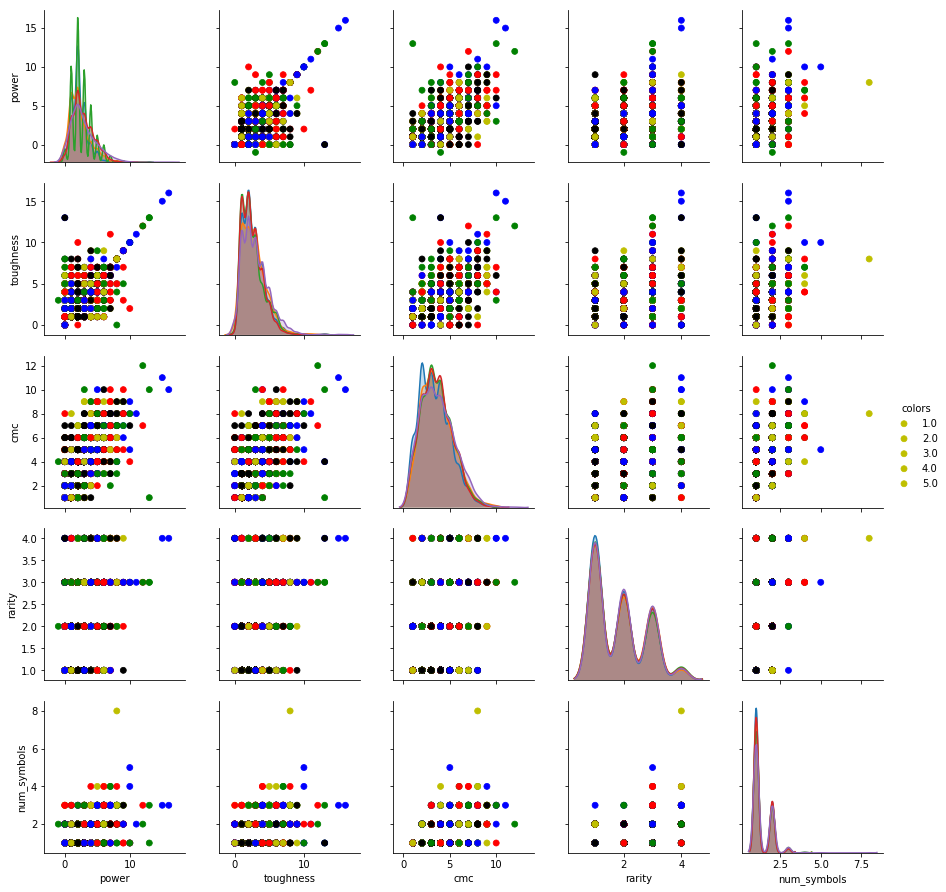

In [14]:
import seaborn as sb
sb.pairplot(data=cards, hue='colors', vars=['power','toughness','cmc','rarity','num_symbols'], plot_kws=dict(edgecolor=['y','b','k','r','g'], facecolor=['y','b','k','r','g'] ) )

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
knn = KNeighborsClassifier()
krange = range(20,40)
param_grid = dict(n_neighbors=krange)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)
results_df = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
results_df['mean_test_score'].plot()

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(20, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='accuracy', verbose=0)

In [21]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train,y_train)
y_pred_class = lr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.2714968152866242


C:\Users\joshu\Anaconda3\envs\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joshu\Anaconda3\envs\Python37\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2603503184713376


In [29]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

Using TensorFlow backend.


In [108]:
from keras.utils.np_utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [109]:
y_train= to_categorical(y_train-1)

In [110]:
y_test = to_categorical(y_test-1)

In [111]:
model = Sequential([
        Dense(18, activation='sigmoid'),
        Dense(10, activation='sigmoid'),
        Dense(10, activation='sigmoid'),
        Dense(10, activation='sigmoid'),
        Dense(5, activation='softmax')
        ])
model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [112]:
model.optimizer.lr=0.02

In [114]:
history = model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test,y_test))

Train on 4476 samples, validate on 498 samples
Epoch 1/1000
4476/4476 [==============================] - 0s 58us/step - loss: 1.5510 - acc: 0.2761 - val_loss: 1.5554 - val_acc: 0.2510
Epoch 2/1000
4476/4476 [==============================] - 0s 49us/step - loss: 1.5514 - acc: 0.2728 - val_loss: 1.5365 - val_acc: 0.2992
Epoch 3/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5589 - acc: 0.2706 - val_loss: 1.5361 - val_acc: 0.2992
Epoch 4/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5525 - acc: 0.2759 - val_loss: 1.5334 - val_acc: 0.3092
Epoch 5/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5530 - acc: 0.2788 - val_loss: 1.5436 - val_acc: 0.2932
Epoch 6/1000
4476/4476 [==============================] - 0s 53us/step - loss: 1.5535 - acc: 0.2764 - val_loss: 1.5329 - val_acc: 0.2932
Epoch 7/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5536 - acc: 0.2741 - val_loss: 1.5392 - val_acc: 0

4476/4476 [==============================] - 0s 63us/step - loss: 1.5510 - acc: 0.2744 - val_loss: 1.5395 - val_acc: 0.3092
Epoch 61/1000
4476/4476 [==============================] - 0s 56us/step - loss: 1.5514 - acc: 0.2813 - val_loss: 1.5366 - val_acc: 0.2771
Epoch 62/1000
4476/4476 [==============================] - 0s 50us/step - loss: 1.5516 - acc: 0.2755 - val_loss: 1.5291 - val_acc: 0.3072
Epoch 63/1000
4476/4476 [==============================] - 0s 44us/step - loss: 1.5471 - acc: 0.2757 - val_loss: 1.5428 - val_acc: 0.2992
Epoch 64/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5518 - acc: 0.2674 - val_loss: 1.5338 - val_acc: 0.2972
Epoch 65/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5484 - acc: 0.2784 - val_loss: 1.5455 - val_acc: 0.3052
Epoch 66/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5492 - acc: 0.2746 - val_loss: 1.5515 - val_acc: 0.2490
Epoch 67/1000
4476/4476 [=======================

4476/4476 [==============================] - 0s 51us/step - loss: 1.5445 - acc: 0.2853 - val_loss: 1.5492 - val_acc: 0.2771
Epoch 120/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5434 - acc: 0.2779 - val_loss: 1.5368 - val_acc: 0.2972
Epoch 121/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5466 - acc: 0.2779 - val_loss: 1.5324 - val_acc: 0.2932
Epoch 122/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5552 - acc: 0.2802 - val_loss: 1.5602 - val_acc: 0.2831
Epoch 123/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5473 - acc: 0.2813 - val_loss: 1.5541 - val_acc: 0.2932
Epoch 124/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5473 - acc: 0.2811 - val_loss: 1.5348 - val_acc: 0.3133
Epoch 125/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5420 - acc: 0.2782 - val_loss: 1.5371 - val_acc: 0.2590
Epoch 126/1000
4476/4476 [================

4476/4476 [==============================] - 0s 71us/step - loss: 1.5346 - acc: 0.2887 - val_loss: 1.5323 - val_acc: 0.2892
Epoch 178/1000
4476/4476 [==============================] - 0s 56us/step - loss: 1.5386 - acc: 0.2777 - val_loss: 1.5336 - val_acc: 0.2751
Epoch 179/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5355 - acc: 0.2866 - val_loss: 1.5408 - val_acc: 0.2892
Epoch 180/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5387 - acc: 0.2804 - val_loss: 1.5381 - val_acc: 0.2731
Epoch 181/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5377 - acc: 0.2866 - val_loss: 1.5265 - val_acc: 0.2992
Epoch 182/1000
4476/4476 [==============================] - 0s 48us/step - loss: 1.5400 - acc: 0.2811 - val_loss: 1.5347 - val_acc: 0.2590
Epoch 183/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5390 - acc: 0.2833 - val_loss: 1.5351 - val_acc: 0.2932
Epoch 184/1000
4476/4476 [================

4476/4476 [==============================] - 0s 55us/step - loss: 1.5300 - acc: 0.2971 - val_loss: 1.5394 - val_acc: 0.2791
Epoch 237/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5304 - acc: 0.2962 - val_loss: 1.5370 - val_acc: 0.3173
Epoch 238/1000
4476/4476 [==============================] - 0s 53us/step - loss: 1.5295 - acc: 0.2945 - val_loss: 1.5197 - val_acc: 0.3052
Epoch 239/1000
4476/4476 [==============================] - 0s 52us/step - loss: 1.5327 - acc: 0.2933 - val_loss: 1.5347 - val_acc: 0.2912
Epoch 240/1000
4476/4476 [==============================] - 0s 52us/step - loss: 1.5340 - acc: 0.2842 - val_loss: 1.5319 - val_acc: 0.2892
Epoch 241/1000
4476/4476 [==============================] - 0s 54us/step - loss: 1.5405 - acc: 0.2799 - val_loss: 1.5384 - val_acc: 0.2912
Epoch 242/1000
4476/4476 [==============================] - 0s 57us/step - loss: 1.5462 - acc: 0.2784 - val_loss: 1.5474 - val_acc: 0.2711
Epoch 243/1000
4476/4476 [================

4476/4476 [==============================] - 0s 76us/step - loss: 1.5426 - acc: 0.2884 - val_loss: 1.5636 - val_acc: 0.2751
Epoch 296/1000
4476/4476 [==============================] - 0s 71us/step - loss: 1.5334 - acc: 0.3034 - val_loss: 1.5540 - val_acc: 0.2631
Epoch 297/1000
4476/4476 [==============================] - 0s 64us/step - loss: 1.5306 - acc: 0.2958 - val_loss: 1.5450 - val_acc: 0.2811
Epoch 298/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5424 - acc: 0.2882 - val_loss: 1.5533 - val_acc: 0.2651
Epoch 299/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5421 - acc: 0.2965 - val_loss: 1.5562 - val_acc: 0.2751
Epoch 300/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5382 - acc: 0.3032 - val_loss: 1.5485 - val_acc: 0.2510
Epoch 301/1000
4476/4476 [==============================] - 0s 53us/step - loss: 1.5339 - acc: 0.2983 - val_loss: 1.5431 - val_acc: 0.2892
Epoch 302/1000
4476/4476 [================

Epoch 354/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5312 - acc: 0.3029 - val_loss: 1.5423 - val_acc: 0.2771
Epoch 355/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5341 - acc: 0.2983 - val_loss: 1.5359 - val_acc: 0.2751
Epoch 356/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5391 - acc: 0.2909 - val_loss: 1.5375 - val_acc: 0.2912
Epoch 357/1000
4476/4476 [==============================] - 0s 51us/step - loss: 1.5279 - acc: 0.2996 - val_loss: 1.5350 - val_acc: 0.2932
Epoch 358/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5245 - acc: 0.2994 - val_loss: 1.5358 - val_acc: 0.2771
Epoch 359/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5239 - acc: 0.3052 - val_loss: 1.5471 - val_acc: 0.2450
Epoch 360/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5247 - acc: 0.3050 - val_loss: 1.5510 - val_acc: 0.2651
Epoch 361/1000
4476/4476 [=

Epoch 413/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5465 - acc: 0.2873 - val_loss: 1.5543 - val_acc: 0.2751
Epoch 414/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5438 - acc: 0.2980 - val_loss: 1.5518 - val_acc: 0.2671
Epoch 415/1000
4476/4476 [==============================] - 0s 48us/step - loss: 1.5499 - acc: 0.2833 - val_loss: 1.5480 - val_acc: 0.2671
Epoch 416/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5393 - acc: 0.2860 - val_loss: 1.5330 - val_acc: 0.2731
Epoch 417/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5459 - acc: 0.2851 - val_loss: 1.5462 - val_acc: 0.2731
Epoch 418/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5463 - acc: 0.2842 - val_loss: 1.5505 - val_acc: 0.2731
Epoch 419/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5436 - acc: 0.2911 - val_loss: 1.5384 - val_acc: 0.2831
Epoch 420/1000
4476/4476 [=

Epoch 472/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5321 - acc: 0.3061 - val_loss: 1.5438 - val_acc: 0.2892
Epoch 473/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5341 - acc: 0.3038 - val_loss: 1.5461 - val_acc: 0.2831
Epoch 474/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5365 - acc: 0.3027 - val_loss: 1.5563 - val_acc: 0.3072
Epoch 475/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5342 - acc: 0.3063 - val_loss: 1.5449 - val_acc: 0.2932
Epoch 476/1000
4476/4476 [==============================] - 0s 49us/step - loss: 1.5326 - acc: 0.3045 - val_loss: 1.5408 - val_acc: 0.2771
Epoch 477/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5294 - acc: 0.3081 - val_loss: 1.5547 - val_acc: 0.2631
Epoch 478/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5363 - acc: 0.3012 - val_loss: 1.5528 - val_acc: 0.2851
Epoch 479/1000
4476/4476 [=

4476/4476 [==============================] - 0s 49us/step - loss: 1.5283 - acc: 0.3047 - val_loss: 1.5294 - val_acc: 0.2932
Epoch 531/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5283 - acc: 0.3027 - val_loss: 1.5404 - val_acc: 0.2771
Epoch 532/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5444 - acc: 0.2927 - val_loss: 1.5471 - val_acc: 0.2972
Epoch 533/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5410 - acc: 0.2871 - val_loss: 1.5393 - val_acc: 0.2892
Epoch 534/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5373 - acc: 0.2922 - val_loss: 1.5376 - val_acc: 0.2811
Epoch 535/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5349 - acc: 0.3027 - val_loss: 1.5409 - val_acc: 0.2831
Epoch 536/1000
4476/4476 [==============================] - 0s 51us/step - loss: 1.5283 - acc: 0.3070 - val_loss: 1.5423 - val_acc: 0.3012
Epoch 537/1000
4476/4476 [================

4476/4476 [==============================] - 0s 55us/step - loss: 1.5347 - acc: 0.2983 - val_loss: 1.5628 - val_acc: 0.2671
Epoch 590/1000
4476/4476 [==============================] - 0s 52us/step - loss: 1.5332 - acc: 0.2916 - val_loss: 1.5440 - val_acc: 0.2932
Epoch 591/1000
4476/4476 [==============================] - 0s 54us/step - loss: 1.5327 - acc: 0.2956 - val_loss: 1.5362 - val_acc: 0.3052
Epoch 592/1000
4476/4476 [==============================] - 0s 60us/step - loss: 1.5408 - acc: 0.2853 - val_loss: 1.5362 - val_acc: 0.2952
Epoch 593/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5305 - acc: 0.3003 - val_loss: 1.5431 - val_acc: 0.3133
Epoch 594/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5439 - acc: 0.2864 - val_loss: 1.5584 - val_acc: 0.2631
Epoch 595/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5405 - acc: 0.2980 - val_loss: 1.5521 - val_acc: 0.2851
Epoch 596/1000
4476/4476 [================

4476/4476 [==============================] - 0s 47us/step - loss: 1.5217 - acc: 0.3088 - val_loss: 1.5374 - val_acc: 0.2811
Epoch 649/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5327 - acc: 0.2974 - val_loss: 1.5403 - val_acc: 0.2590
Epoch 650/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5393 - acc: 0.2967 - val_loss: 1.5424 - val_acc: 0.2992
Epoch 651/1000
4476/4476 [==============================] - 0s 58us/step - loss: 1.5343 - acc: 0.3007 - val_loss: 1.5349 - val_acc: 0.3052
Epoch 652/1000
4476/4476 [==============================] - 0s 69us/step - loss: 1.5364 - acc: 0.2978 - val_loss: 1.5482 - val_acc: 0.2570
Epoch 653/1000
4476/4476 [==============================] - 0s 60us/step - loss: 1.5359 - acc: 0.3045 - val_loss: 1.5548 - val_acc: 0.2972
Epoch 654/1000
4476/4476 [==============================] - 0s 59us/step - loss: 1.5360 - acc: 0.2969 - val_loss: 1.5543 - val_acc: 0.2791
Epoch 655/1000
4476/4476 [================

4476/4476 [==============================] - 0s 62us/step - loss: 1.5331 - acc: 0.2958 - val_loss: 1.5366 - val_acc: 0.3112
Epoch 708/1000
4476/4476 [==============================] - 0s 59us/step - loss: 1.5386 - acc: 0.3038 - val_loss: 1.5833 - val_acc: 0.2671
Epoch 709/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5525 - acc: 0.2857 - val_loss: 1.5410 - val_acc: 0.2570
Epoch 710/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5434 - acc: 0.2924 - val_loss: 1.5625 - val_acc: 0.2470
Epoch 711/1000
4476/4476 [==============================] - 0s 57us/step - loss: 1.5431 - acc: 0.2962 - val_loss: 1.5547 - val_acc: 0.2791
Epoch 712/1000
4476/4476 [==============================] - 0s 56us/step - loss: 1.5382 - acc: 0.2976 - val_loss: 1.5579 - val_acc: 0.2871
Epoch 713/1000
4476/4476 [==============================] - 0s 55us/step - loss: 1.5352 - acc: 0.3012 - val_loss: 1.5634 - val_acc: 0.2570
Epoch 714/1000
4476/4476 [================

4476/4476 [==============================] - 0s 47us/step - loss: 1.5202 - acc: 0.3099 - val_loss: 1.5548 - val_acc: 0.2731
Epoch 767/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5212 - acc: 0.3032 - val_loss: 1.5424 - val_acc: 0.2952
Epoch 768/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5206 - acc: 0.3117 - val_loss: 1.5430 - val_acc: 0.2711
Epoch 769/1000
4476/4476 [==============================] - 0s 48us/step - loss: 1.5134 - acc: 0.3166 - val_loss: 1.5547 - val_acc: 0.2631
Epoch 770/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5138 - acc: 0.3150 - val_loss: 1.5404 - val_acc: 0.2671
Epoch 771/1000
4476/4476 [==============================] - 0s 47us/step - loss: 1.5143 - acc: 0.3150 - val_loss: 1.5459 - val_acc: 0.2791
Epoch 772/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5207 - acc: 0.3112 - val_loss: 1.5370 - val_acc: 0.2912
Epoch 773/1000
4476/4476 [================

4476/4476 [==============================] - 0s 47us/step - loss: 1.5296 - acc: 0.3009 - val_loss: 1.5559 - val_acc: 0.2912
Epoch 826/1000
4476/4476 [==============================] - 0s 48us/step - loss: 1.5233 - acc: 0.3063 - val_loss: 1.5493 - val_acc: 0.2811
Epoch 827/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5256 - acc: 0.3032 - val_loss: 1.5650 - val_acc: 0.2631
Epoch 828/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5280 - acc: 0.2956 - val_loss: 1.5501 - val_acc: 0.2871
Epoch 829/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5298 - acc: 0.2985 - val_loss: 1.5484 - val_acc: 0.2731
Epoch 830/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5284 - acc: 0.2936 - val_loss: 1.5559 - val_acc: 0.2590
Epoch 831/1000
4476/4476 [==============================] - 0s 50us/step - loss: 1.5262 - acc: 0.2965 - val_loss: 1.5591 - val_acc: 0.2550
Epoch 832/1000
4476/4476 [================

4476/4476 [==============================] - 0s 47us/step - loss: 1.5194 - acc: 0.3110 - val_loss: 1.5623 - val_acc: 0.2450
Epoch 885/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5238 - acc: 0.3027 - val_loss: 1.5527 - val_acc: 0.2771
Epoch 886/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5150 - acc: 0.3045 - val_loss: 1.5570 - val_acc: 0.2932
Epoch 887/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5190 - acc: 0.2994 - val_loss: 1.5437 - val_acc: 0.2932
Epoch 888/1000
4476/4476 [==============================] - 0s 48us/step - loss: 1.5221 - acc: 0.2992 - val_loss: 1.5523 - val_acc: 0.2530
Epoch 889/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5330 - acc: 0.3038 - val_loss: 1.5538 - val_acc: 0.2952
Epoch 890/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5308 - acc: 0.2962 - val_loss: 1.5602 - val_acc: 0.2711
Epoch 891/1000
4476/4476 [================

4476/4476 [==============================] - 0s 56us/step - loss: 1.5259 - acc: 0.2994 - val_loss: 1.5423 - val_acc: 0.2691
Epoch 944/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5261 - acc: 0.3016 - val_loss: 1.5449 - val_acc: 0.2631
Epoch 945/1000
4476/4476 [==============================] - 0s 45us/step - loss: 1.5235 - acc: 0.3047 - val_loss: 1.5632 - val_acc: 0.2932
Epoch 946/1000
4476/4476 [==============================] - 0s 49us/step - loss: 1.5269 - acc: 0.3027 - val_loss: 1.5572 - val_acc: 0.2651
Epoch 947/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5240 - acc: 0.3081 - val_loss: 1.5481 - val_acc: 0.2510
Epoch 948/1000
4476/4476 [==============================] - 0s 48us/step - loss: 1.5236 - acc: 0.3079 - val_loss: 1.5606 - val_acc: 0.2631
Epoch 949/1000
4476/4476 [==============================] - 0s 46us/step - loss: 1.5284 - acc: 0.3088 - val_loss: 1.5635 - val_acc: 0.2791
Epoch 950/1000
4476/4476 [================

In [32]:
y_train

array([2, 4, 5, ..., 5, 2, 4], dtype=int64)

In [29]:
sum(y_train)

array([  0., 799., 678., 750., 711., 826.], dtype=float32)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier(n_estimators=100)

In [18]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [155]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [156]:
rf.score(X_test,y_test)

0.26506024096385544

In [157]:
rf.feature_importances_

array([0.04641751, 0.04981853, 0.04631088, 0.01808401, 0.01004744,
       0.01505064, 0.0706515 , 0.08307111, 0.0858907 , 0.05710482,
       0.04866425, 0.05280965, 0.04515467, 0.01758416, 0.01717724,
       0.0181861 , 0.05980075, 0.07330297, 0.07424062, 0.07529329,
       0.03533916])

In [146]:
toX.columns

Index(['power', 'toughness', 'cmc', 'num_symbols', 'pow_gt_tou', 'pow_eq_tou',
       'pow_tou_ratio', 'pow_cmc_ratio', 'tou_cmc_ratio', 'symbols_per_cmc',
       'pow_sq', 'tou_sq', 'cmc_sq', 'num_sym_sq', 'num_sym_cube',
       'num_sym_fourth', 'cmc_ratio_num_sym_sq', 'is_common', 'is_uncommon',
       'is_rare', 'is_mythic'],
      dtype='object')

In [149]:
tmp = pd.DataFrame([rf.feature_importances_],columns=toX.columns)

In [150]:
tmp

,power,toughness,cmc,num_symbols,pow_gt_tou,pow_eq_tou,pow_tou_ratio,pow_cmc_ratio,tou_cmc_ratio,symbols_per_cmc,...,tou_sq,cmc_sq,num_sym_sq,num_sym_cube,num_sym_fourth,cmc_ratio_num_sym_sq,is_common,is_uncommon,is_rare,is_mythic
0,0.048739,0.051764,0.043429,0.016876,0.011746,0.014271,0.067534,0.085912,0.087202,0.05621,...,0.054541,0.04535,0.017868,0.017007,0.018033,0.059395,0.072193,0.075634,0.071218,0.03511


I've learned that the rarity is very important, but I can't figure out why.